# Contents:

#### Import libraries and establish dataframe objects
#### Creating bar charts
#### Creating a sample
#### Creating a line chart
#### Creating a histogram for hour_order_placed
#### Creating a bar chart for loyalty_flag
#### Creating a line chart for price by hour of day
#### Exploratory analysis of customer demographics
#### Visualizing the relationship between age and spending power

# Import libraries and establish dataframe objects

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# To establish a path to the Instacart project folder
path=r'C:\Users\Shelb\OneDrive\Documents\CF Coursework\Python Fundamentals for Data Analysts\10-2022 Instacart Basket Analysis'

In [3]:
# To import the most updated version of the Instacart data set
df=pd.read_pickle(os.path.join(path,'Data','Prepared Data','11-17_integrated_data.pkl'))

# Creating bar charts

In [4]:
# Reminder of column names
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'hour_order_placed', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'avg_days_since_last_order', 'order_frequency', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'fam_status', 'income', '_merge'],
      dtype='object')

<AxesSubplot:>

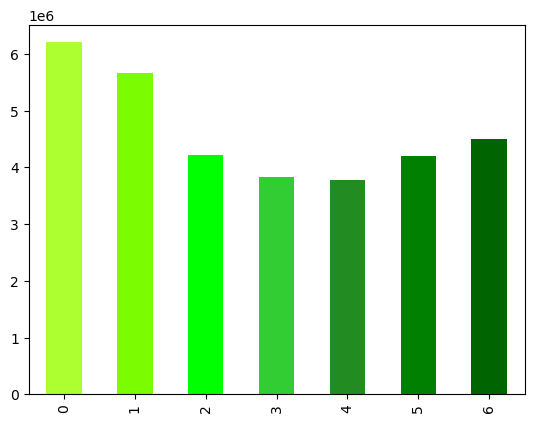

In [5]:
# To create a bar chart for the order_day_of_week column
df['order_day_of_week'].value_counts().sort_index().plot.bar(color=['greenyellow','lawngreen','lime','limegreen','forestgreen','green','darkgreen'])

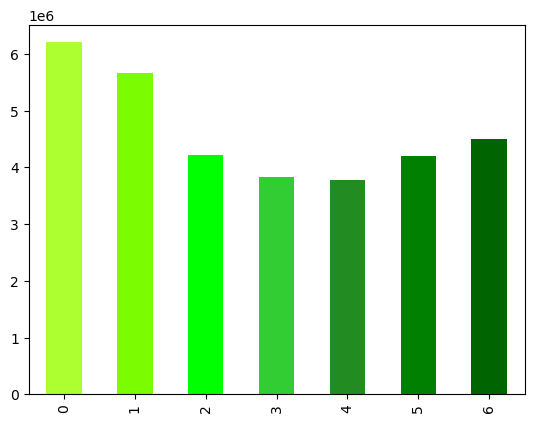

In [6]:
# To turn the above bar chart into an object and export it as a PNG
bar=df['order_day_of_week'].value_counts().sort_index().plot.bar(color=['greenyellow','lawngreen','lime','limegreen','forestgreen','green','darkgreen'])

In [7]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_orders_dow.png'))

# Creating histograms

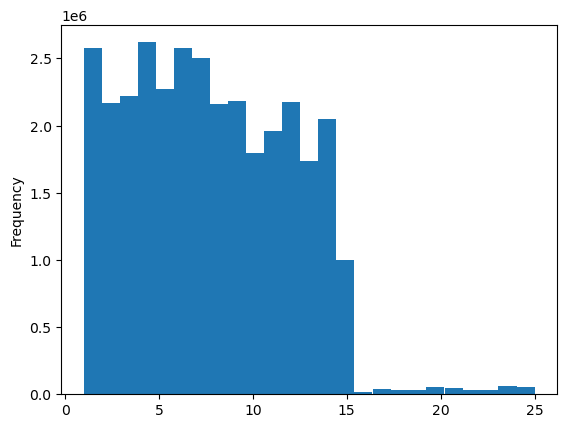

In [8]:
# To create a histogram for the prices column
hist=df['prices'].plot.hist(bins=25)

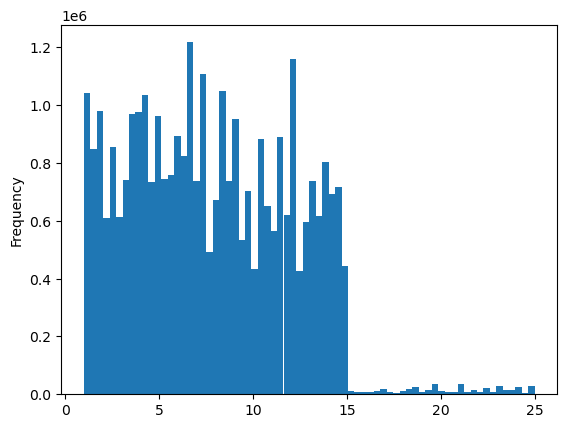

In [9]:
# To create a histogram of the prices column with greater granularity by increasing the number of bins
hist_2=df['prices'].plot.hist(bins=70)

In [10]:
# To export hist_2 as a PNG
hist_2.figure.savefig(os.path.join(path,'Analysis','Visualizations','hist.png'))

# Creating a sample

In [11]:
# To split the dataframe and create a smaller random sample
np.random.seed(4)
dev=np.random.rand(len(df))<=0.7

In [12]:
# To create a sample 70% of the size of df named 'big'
big=df[dev]

In [13]:
# To create a sample 30% of the size of df named 'small'
small=df[~dev]

In [14]:
# To check length of both samples against length of df
len(df)

32404859

In [15]:
len(big)+len(small)

32404859

In [16]:
# To further improve procesing time by creating a subset of 'small' with only necessary columns
df_2=small[['order_day_of_week','prices']]

# Creating a linechart

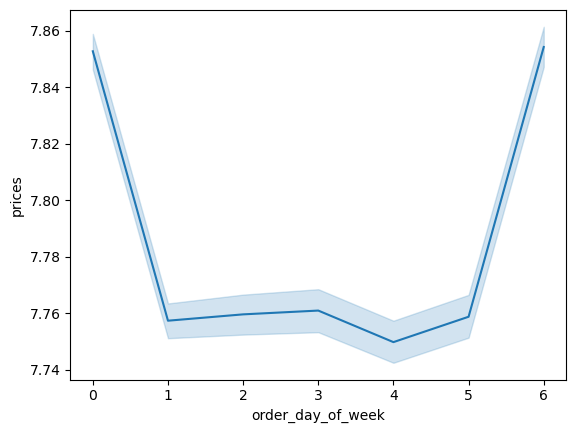

In [17]:
# To create a linechart from the sample subset df_2
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [18]:
# To save the linechart as a PNG
line.figure.savefig(os.path.join(path,'Analysis','Visualizations','dow_price_line.png'))

# Creating a histogram of the hour_order_placed column

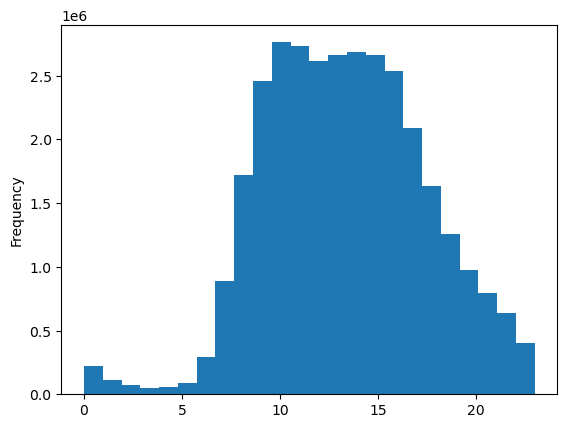

In [19]:
# To create a histogram of hour_order_placed
orders_by_hour_hist=df['hour_order_placed'].plot.hist(bins=24)

### The orders_by_hour histogram shows us that 9 am is the hour of the day that sees the most online orders and that online orders tend to peak from 8 am to 4 pm

In [20]:
# To save orders_by_hour_hist as a PNG
orders_by_hour_hist.figure.savefig(os.path.join(path,'Analysis','Visualizations','orders_by_hour_hist.png'))

# Creating a bar chart from the loyalty_flag column

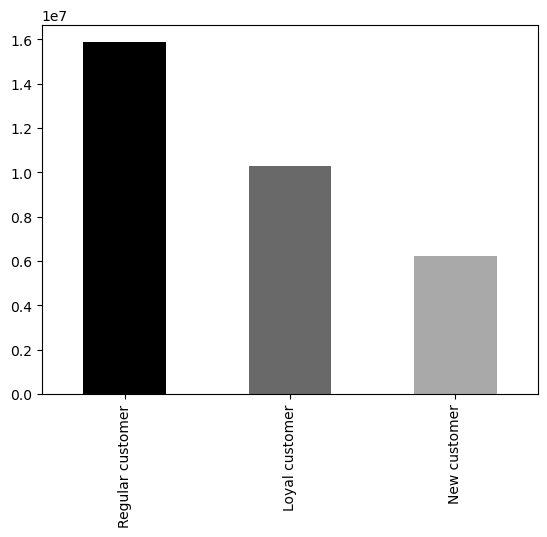

In [21]:
loyalty_flag_bar=df['loyalty_flag'].value_counts().plot.bar(color=['black','dimgrey','darkgrey'])

### The loyalty_flag bar chart shows that while the loyal customer group has placed more orders than the new customer group, they have not placed more orders than the regular customer group

In [22]:
# To export loyalty_flag_bar as a PNG
loyalty_flag_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','loyalty_flag_bar.png'))

# Creating a line chart to display price by hour of day

In [23]:
# To use the random sample taken previously to create a smaller dataframe with only the prices and hour_order_placed columns
df_price_by_hour=small[['hour_order_placed','prices']]

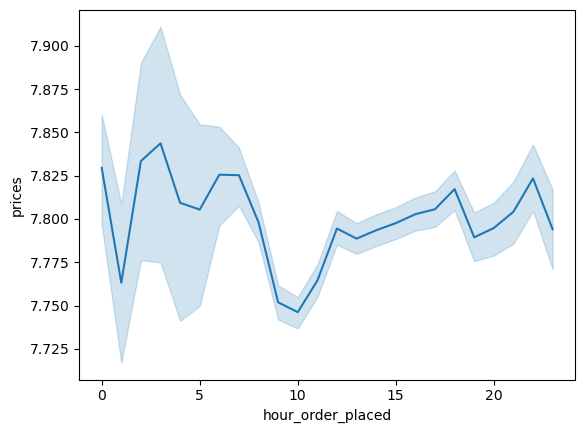

In [24]:
# To create a line chart from this sample data
price_by_hour_line=sns.lineplot(data=df_price_by_hour, x= 'hour_order_placed', y= 'prices')

### The highest expenditures tend to be early in the day at around 5 or 6 am and the lowest expenditures tend to happen around 10 am. This could possibly reflect users primarily either placing orders in the morning before they leave for work or waiting until the end of the work day/ during or after their lunch breaks

In [25]:
# To export price_by_hour_line as a PNG
price_by_hour_line.figure.savefig(os.path.join(path,'Analysis','Visualizations','price_by_hour_line.png'))

# Exploratory analysis of customer demographics

In [26]:
# To use the random sample taken previously to create a smaller dataframe with only the age and dependants columns
df_age_fam=small[['age','dependants']]

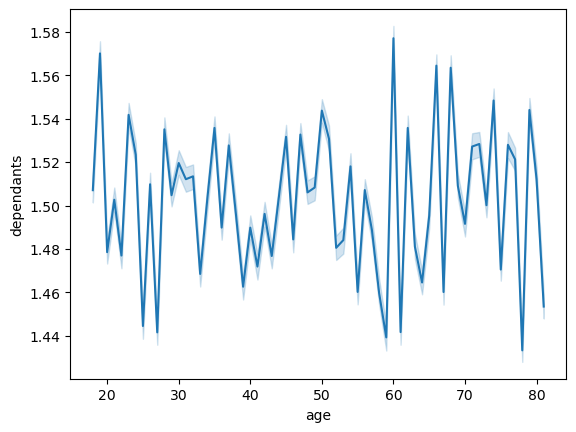

In [27]:
# To create a line chart depicting number of dependants by age
age_fam_line=sns.lineplot(data= df_age_fam, x= 'age', y='dependants')

### There does not seem to be a relationship between customer age and number of dependents

In [28]:
# To save age_fam_line as a PNG
age_fam_line.figure.savefig(os.path.join(path,'Analysis','Visualizations','age_fam_line.png'))

# Visualizing the relationship between age and spending power

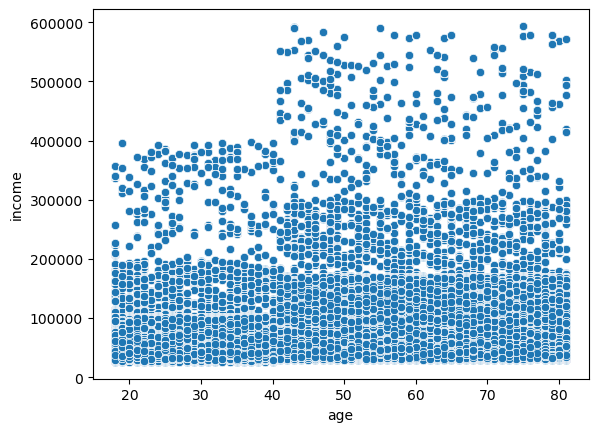

In [29]:
income_by_age_scatter=sns.scatterplot(x= 'age', y= 'income', data= small)

### There seems to be a positive relationship between age and spending power

In [30]:
# To export income_by_age_scatter as a PNG
income_by_age_scatter.figure.savefig(os.path.join(path,'Analysis','Visualizations','income_by_age_scatter.png'))